In [54]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [55]:
look_back = 8

In [10]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)

mask = df.name.str.contains("Videolab")
videolab = df[~mask]
df = videolab.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)

# INPUT PARAMS:
# Data source -> which column contains the data to be predicted
# Preferred sampling period (EQUAL TO output period)
# Lookback_time -> [6,7,8,9] -> 10 OR [1,2,3,4,5,6,7,8,9] -> 10

,value
timestamp,
2021-04-05 02:00:00,3.0
2021-04-05 02:15:00,3.0
2021-04-05 02:30:00,3.0
2021-04-05 02:45:00,3.0
2021-04-05 03:00:00,3.0
...,...
2021-05-06 15:30:00,2.0
2021-05-06 15:45:00,2.0
2021-05-06 16:00:00,2.0


Split the data into test and train, as wel as extracting the dates, later used for plotting

In [5]:

df["timestamp"] = df.index
df["value"] = df["value"].fillna(0)

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]

Creation of the test and train generator using the `TimeseriesGenerator` class from TensorFlow. This generator class automatically transforms this data from a series to a supervised learning model.

In [6]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[6.]
[6.]
[6.]
[7.]
[7.]
[7.]
[7.]
[6.]
[7.]
[7.]
[7.]
[7.]
[6.]
[5.]
[5.]
[5.]
[4.]
[4.]
[3.]
[4.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[6.]
[6.]
[6.]
[6.]
[5.]
[5.]
[5.]
[5.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[2.]
[3.]
[3.]
[4.]
[3.]
[3.]
[3.]
[4.]
[4.]
[3.]
[3.]
[2.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[5.]
[5.]
[5.]
[4.]
[4.]
[5.]
[5.]
[6.]
[6.]
[7.]
[7.]
[7.]
[8.]
[6.]
[6.]
[7.]
[6.]
[6.]
[5.]
[4.]
[5.]
[5.]
[6.]
[6.]
[5.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[5.]
[4.]
[4.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[2.]
[3.]
[3.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]


Define LSTM model with 25 epochs of training

In [78]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

num_epochs = 25

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/50
484/484 [==============================] - 2s 4ms/step - loss: 3.1691
Epoch 2/50
484/484 [==============================] - 2s 3ms/step - loss: 0.9338
Epoch 3/50
484/484 [==============================] - 2s 3ms/step - loss: 0.7160
Epoch 4/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6539
Epoch 5/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6421
Epoch 6/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6451
Epoch 7/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6218
Epoch 8/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6259
Epoch 9/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6086
Epoch 10/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6127
Epoch 11/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5996
Epoch 12/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5882
Epoch 13/50
484/484 [====

In [ ]:
model.save("15M")

Plot the predictions and the actual data

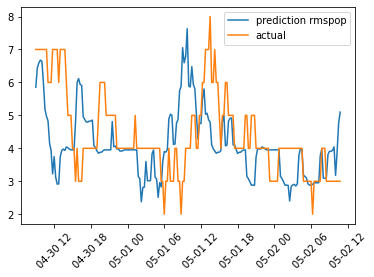

In [22]:
prediction = model.predict(test_generator)

prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[start_index:end_index], prediction[start_index:end_index], label='prediction')
plt.plot(date_test[start_index:end_index], parking_test[start_index:end_index], label='actual')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

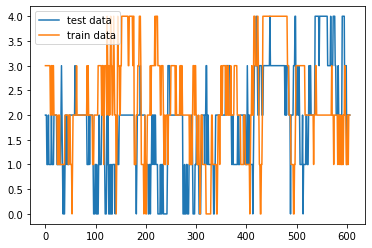

In [84]:
plt.plot(test_generator.data, label="test data")
plt.plot(train_generator.data[20:len(test_generator.data)+20], label="train data")
plt.legend(loc="best")